### Load Dataset from Huggingface

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datasets import load_dataset

In [3]:
dataset = load_dataset("cnn_dailymail", "3.0.0")

  0%|          | 0/3 [00:00<?, ?it/s]

### Write Dataset to GCS Bucket

In [4]:
from google.colab import auth
auth.authenticate_user()

!gcloud config set project cnn-dailymail-387022

Updated property [core/project].


In [5]:
from google.cloud import storage

storage_client = storage.Client()
bucket = storage_client.bucket("cnn-dailymail-data")

for split in dataset:
  print(f"Processing split '{split}'")
  df = dataset[split].to_pandas()
  filename = f'{split}.csv'
  df.to_csv(filename, index=False, encoding="utf-8")
  blob = bucket.blob(filename)
  blob.upload_from_filename(filename)

Processing split 'train'
Processing split 'validation'
Processing split 'test'


### Load Dataset from GCS Bucket

In [6]:
!pip install gcsfs
import gcsfs
fs = gcsfs.GCSFileSystem(project="cnn-dailymail-387022")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd

with fs.open("gs://cnn-dailymail-data/train.csv") as fp:
  train_df = pd.read_csv(fp)

### Visualize data stats

In [8]:
import matplotlib.pyplot as plt

def plot_hist(s):
    average = s.mean()
    median = s.median()
    s.hist(grid=False, bins=30)
    plt.axvline(average, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {average:.2f}')
    plt.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    plt.legend()

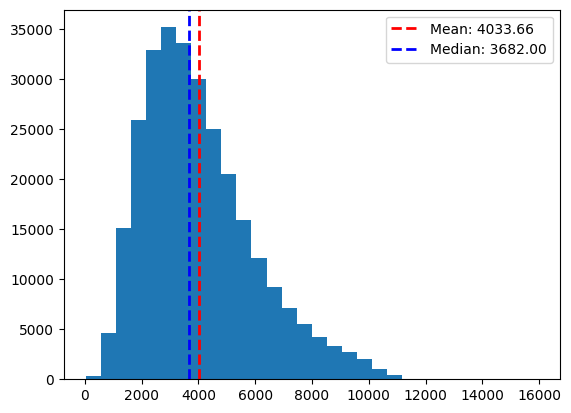

In [9]:
plot_hist(train_df["article"].apply(lambda x: len(x)))

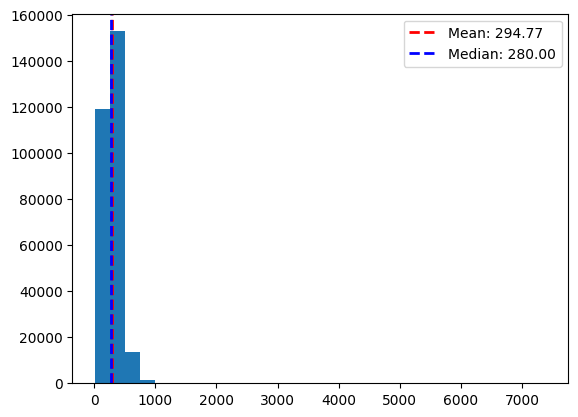

In [10]:
highlight_len = train_df["highlights"].apply(lambda x: len(x))
plot_hist(highlight_len)

In [11]:
sum(highlight_len > 1000), highlight_len.max()

(289, 7388)